# Introduction

### Background

IMDb is one of the largest movie databases that stores movies, TV series, and celebrity content around the globe. Moreover, the online platform recommends shows and movies that crowds might be interested in on a timely basis. Audiences can rate and comment on these contents on the platform. Over the past 25 years, many reviews and comments are accumulated, and the value of these data is yet to be discovered and investigated. Sentiments can be detected, harvested, and further analysed from these reviews. Knowledge and patterns generated from such analytics are reflected in the recommendation performance of the website and provide insights into popular taste. Appropriate suggestions are given to the company to improve the accuracy and precision of the recommendation system. Optimizing the recommendation system can increase the publicity and credibility of the platform. Furthermore, a robust brand image can maintain the loyalty of a large pool of audiences and attract potential investors to advertise on the platform. With such context, this project is designed to predict the sentiment of the reviews accurately and yield insights from the reviews.

### Method of Study

#### Data Source
25000 movie reviews with both positive and negative sentiments were extracted from IMDb. The reviews contain three fields, which are the user's id, labelled sentiment (1 for positive and 0 for negative), and review content in text respectively.

#### Sample Selection
70% of the dataset is fed into the training model while the rest are considered as testing datasets. Stratifying and random sampling are utilized to ensure the balance of the dataset.

#### Models used
8 classifiers are trained and compared for accuracy and precision comparison. They are logistic regression, stochastic gradient descent classifier (SGD Classifier), linear support vector machine, decision tree, random forest, navie bayes classifier, k-nearest neighbor, and XGBoost.

# Analysis Result (Summary)

XGBoost is the final model with a training time of around 280-360 seconds. The five most important features are the compound score from the sentiment analyzer of VADER, the 6th vector and the TI-DIF metric of "bad", "waste", and "awful". 

During the analysis, movies with special effects attract the most audiences, and story plot and acting performance are vital aspects when reviewing a movie. The audience heavily criticizes horror movies and mature content such as sex and fighting scenes and prefer movie content such as rom-coms or dramatic content.

It is recommended to avoid promoting movies that have mature content, or genres that are viewed negatively, such as horror movies, while romantic  comedies, comedies, and drama movies will have a larger potential audience, and are worth promoting. Movies with split views are used as personalization options.


# Data Exploration

Both basic and advanced data exploration are conducted in the DEA. Basic exploration focuses on the properties of a single component of the dataset, while advanced exploration illustrates the structure of the dataset.

### Basic Data Exploration

Unique values, null objects, duplicated data, sentiment annotations, and review samples with positive and negative sentiment are scanned in this section. This provides the direction to support further data exploration and pre-processing.

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install xgboost
!pip install gensim
import spacy
!python -m spacy download en_core_web_lg

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-d

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.0/587.7 MB 388.9 kB/s eta 0:25:12
     -------------------------------------- 0.1/587.7 MB 655.4 kB/s eta 0:14:57
     ---------------------------------------- 0.3/587.7 MB 1.5 MB/s eta 0:06:20
     ---------------------------------------- 0.6/587.7 MB 2.5 MB/s eta 0:03:53
     ---------------------------------------- 0.9/587.7 MB 3.4 MB/s eta 0:02:54
     ---------------------------------------- 2.0/587.7 MB 6.4 MB/s eta 0:01:31
     --------------------------------------- 4.1/587.7 MB 11.5 MB/s eta 0:00:51
      -------------------------------------- 8.0/587.7 MB 19.6 MB/s eta 0:00:30
      -------------------------------------- 8.8/587.7 MB 21.6 MB/s eta 0:00:27
      ------------------------------------- 13.0/587.7 MB 65.6 MB/s eta 0:00:09
     - ------------------------------------ 17.8/587.7

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Read data
movReview=pd.read_csv('./IMDB Dataset.csv')
print(movReview.shape)
movReview.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


Replace all sentiment to integers

In [4]:
movReview = movReview.replace(to_replace = "positive", value = 1)
movReview = movReview.replace(to_replace = "negative", value = 0)
movReview.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


No null values are detected in the dataset.

In [5]:
# movReview.info()

It is found that 96 reviews are the same. These duplicated data will not cause data imbalance in this project as it is an insignificant portion of the dataset (418*2/50000 = 1.67% < 2%).

In [6]:
# display(movReview[movReview.duplicated()].head())
# print("Duplicated reviews:", movReview[movReview.duplicated()].shape[0])

Both positive and negative reviews are equally distributed across the dataset. Therefore, up-sampling and down-weighting approaches are not required to be performed.

In [7]:
# movReview.sentiment.value_counts()

From the reviews below, mistakes such as inconsistent sentence structure, bad syntax, colloquialism, html tags, wrong spellings, abbreviations, and lousy casing, are being identified. Moreover, it is observed that a single review contains a mixture of positive and negative wordings. In addition, sentiment-unrelated paragraphs are noticed within these comments. This may impact the sensitivity of the model.

In [8]:
# movReview[movReview["sentiment"] == 0]["review"].head(10)

In [9]:
# Select one reivew from positive sentiment column and negative sentiment column.
pos=movReview[movReview["sentiment"] == 1]["review"][13466]
neg=movReview[movReview["sentiment"] == 0]["review"][4103]

In [10]:
# print("Positive Sentiment:\n\n"+pos+"\n\n"+"Negative Sentiment:\n\n"+neg)

### Advanced Data Exploration

The structure of both negative and positive reviews is contrasted to determine whether the dataset is formed with equal properties. A classification model with a balanced dataset would generate more accurate and balanced models.

Before pre-processing, we assumed that audiences with different sentiments used distinctive vocabs to express their feelings. Thus, the vocabs in reviews are being evaluated to see if it is a suitable feature to differentiate between positive sentiment and negative sentiment.

Libraries that check for stop words, tokenize text, and identify collocation are imported to conduct in this section.

In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk import word_tokenize

from IPython.display import display_html
from itertools import chain,cycle

In [12]:
# Finding the average word length
def avg_word(sentence):
    return(sum(len(word) for word in sentence.split())/len(sentence))

# Counting the words
def word_count(sentence):
    return(len(sentence.split(" ")))

# Counting the number of characters
def char_count(sentence):
    return(len(sentence))

# Identifying the number of stop words in each review
def stop_words(sentence):
    return(len([x for x in word_tokenize(sentence) if x in stop]))

# Locating special characters in each review
def special_chars(str):
    special = 0
    for i in range(len(str)):
        if str[i].isupper() | str[i].islower()|str[i].isdigit()|str[i].isspace():
            continue
        else:
            special+= 1
    return(special)

# Return a dataframe that conclude the overall statistics of basic features
def basic_features_extraction(text):
     return(pd.DataFrame({"avg_word":text.apply(lambda x: avg_word(x)),
                         "word_count":text.apply(lambda x: word_count(x)),
                         "char_count":text.apply(lambda x: char_count(x)),
                         "stop_words":text.apply(lambda x: stop_words(x)),
                         "special_chars":text.apply(lambda x: special_chars(x))}).describe())
    
# Displaying the results side by side for easier comparison
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# Group by the number of words for each review 
def word_count_extraction(text):
    return(pd.DataFrame({"word_count":text.apply(lambda x: word_count(x))}).groupby(['word_count']).\
    size().sort_values(ascending=False).reset_index(name ='total_word_count'))

# Viewing the distribution of word counts across the dataset
def histogram(df,x,y,selection=None,fun=None):
    if selection is not None:
        if fun=='n':
            fig = px.histogram(df, x=x, y=y,color=selection)
        else :
            fig = px.histogram(df, x=x, y=y,color=selection, histfunc=fun, barmode="group")
        return (fig.show())
    else:
        fig = px.histogram(df, x=x, y=y)
        fig.update_xaxes(range=[0, 1550])
        fig.update_yaxes(range=[0, 3600])
        return (fig.show())

The sentence structure between the reviews with positive sentiment and reviews with negative sentiment is similar. It is concluded that the dataset is balanced with similar properties and the same pre-processing method can be applied to both datasets.

In [13]:
pos_basic_features=basic_features_extraction(movReview[movReview["sentiment"] == 1].review)
neg_basic_features=basic_features_extraction(movReview[movReview["sentiment"] == 0].review)
display_side_by_side(pos_basic_features, neg_basic_features, titles=['Positive Sentiment', 'Negative Sentiment'])

,avg_word,word_count,char_count,stop_words,special_chars
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.823537,232.837760,1324.797680,99.397480,51.661640
std,0.011074,177.475492,1031.492627,77.161428,44.110415
min,0.554381,10.000000,65.000000,0.000000,0.000000
25%,0.816839,125.000000,691.000000,52.000000,22.000000
50%,0.823797,172.000000,968.000000,74.000000,38.000000
75%,0.830579,284.000000,1614.000000,120.000000,67.000000
max,0.926027,2470.000000,13704.000000,1059.000000,657.000000
,avg_word,word_count,char_count,stop_words,special_chars
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000


From the below histograms, both graphs have the same right-skewed shape, which represents that both reviews have the same distribution pattern of words. This justifies that the dataset is balanced with equal number of input samples.

In [14]:
# histogram(word_count_extraction(movReview[movReview["sentiment"] == 1].review), 'word_count', 'total_word_count')

In [15]:
# histogram(word_count_extraction(movReview[movReview["sentiment"] == 0].review), 'word_count', 'total_word_count')

In [16]:
# Finding the occurrence of vocabs in each review
def vocab_count(dataframe, text, selection):
    return(pd.Series(' '.join(dataframe[dataframe["sentiment"]==selection][text]).split()).value_counts())

# Showing the vocabs list that used most often in the specific sentiment
def vocab_list(dataframe, text, selection):
    
    df=pd.concat([vocab_count(dataframe, text, 0),vocab_count(dataframe, text, 1)],axis=1)
    df=df.fillna(0)
    df.columns = ['neg', 'pos']

    if selection=='pos':
        return(pd.DataFrame({selection:df[df[selection] > df['neg']][selection]}).sort_values(by=selection, ascending=False))
    if selection=='neg':
        return(pd.DataFrame({selection:df[df[selection] > df['pos']][selection]}).sort_values(by=selection, ascending=False))
               
# Display the comparison in the form of horizontal barchart
def hori_barchart(df,x,y,selection,title):
    fig = px.histogram(df, x=y, y=x, height=700,color=selection,barmode="group")
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    return (fig.show())
    
def change_id(df):
    df=pd.DataFrame(df,columns=['value'])
    df['id']=df.index
    return(df)

# Comparing the number of particular words in both sentiments 
def word_comparison(text):
    df_neg=change_id(vocab_count(movReview, text, 0))
    df_pos=change_id(vocab_count(movReview, text, 1))

    df_neg['sentiment'], df_pos['sentiment']=0, 1

    df_combine=pd.concat([df_pos[:20], df_neg[:20]],ignore_index=True).sort_values(by ='value', ascending = False)

    hori_barchart(df_combine, 'id', 'value', 'sentiment', 'Word')

The below charts suggested that both sentiments own different types of wordings. However, the statement of using distinctive words to identify sentiments is yet to be verified at this stage.

In [17]:
# display_side_by_side(vocab_list(movReview, 'review', "pos")[:49], vocab_list(movReview, 'review', "neg")[:49], titles=['Positive Sentiment', 'Negative Sentiment'])

In [18]:
# Most common words in both sentiments
# word_comparison('review')

# Data Processing

Performing text pre-processing requires libraries that return the wordnet object value corresponding to the POS tag, allow text filtering and manipulation, and predict sentiment predicting. During this process, stop words, special characters, non-alphabetic letters, html-tags, and punctuations are removed. In addition, the words that match with a specific part of speech, such as nouns, verbs, adjectives, and adverbs are being transformed and lemmatized.


Although misspelling is observed in the data exploration, the method of correcting the spelling (TextBlob) consumes an enormous amount of computing resources. This may be considered in future projects.

In [19]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

In [20]:
# Extracting english words with the correct format.
def filter_stop_br_special(text):
    texts=[]
    for i in word_tokenize(text) :
            temp_word=''
            for x in range(len(i)):
                if i[x].isupper() | i[x].islower():
                    temp_word+=i[x].lower()
                else:
                    break
            if len(temp_word)>1 and len(temp_word) == len(i) and temp_word not in stop and temp_word != 'br' :
                texts.append(temp_word)
    return(' '.join(texts))

# Returning the wordnet object that corresponding to part of speech tag
def get_wordnet_pos(pos_tags):
    pos=pos_tags[0]
    if pos=='J':
        return wordnet.ADJ
    elif pos=='V':
        return wordnet.VERB
    elif pos=='N':
        return wordnet.NOUN
    elif pos=='R':
        return wordnet.ADV
    else:
        return wordnet.NOUN

# lemmatizing words that match with specific part of speech tag
def process(text):
    pos_tags = pos_tag(word_tokenize(filter_stop_br_special(text)))
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    return(' '.join(text))

The process function is enforced on the positive and negative samples. The overall neutral score is dropped slightly, while the negative or positive scores are enhanced in both cases. In addition, the compound score, which suggests the intensity of certain sentiments, has been rectified. This supports that the processing has greatly improved the sensitivity of the sentiment analyzer.

In [21]:
# # Samples of reviews before and after processing
# print("Positive Review (Before processing):\n\n"+pos+"\n\n"+
#       str(sid_obj.polarity_scores(pos))+"\n\n"+
#      "Positive Review (After processing):\n\n"+process(pos)+"\n\n"+
#       str(sid_obj.polarity_scores(process(pos)))+"\n\n")

# print("Negative Review (Before processing):\n\n"+neg+"\n\n"+
#       str(sid_obj.polarity_scores(neg))+"\n\n"+
#      "Negative Review (After processing):\n\n"+process(neg)+"\n\n"+
#       str(sid_obj.polarity_scores(process(neg))))

In [22]:
# Applying the preprocessing function on the dataset
movReview["review_clean"]=movReview["review"].apply(lambda x: process(x))
movReview.head(10)

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,1,one reviewer mention watch oz episode hook rig...
1,A wonderful little production. <br /><br />The...,1,wonderful little production film technique fas...
2,I thought this was a wonderful way to spend ti...,1,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",1,probably favorite movie story selflessness sac...
6,I sure would like to see a resurrection of a u...,1,sure would like see resurrection date seahunt ...
7,"This show was an amazing, fresh & innovative i...",0,show amazing fresh innovative idea first air f...
8,Encouraged by the positive comments about this...,0,encourage positive comment film look forward w...
9,If you like original gut wrenching laughter yo...,1,like original gut wrench laughter like movie y...


The number of words has been halved after processing.

In [23]:
# pos_basic_features=basic_features_extraction(movReview[movReview["sentiment"] == 1].review_clean)
# neg_basic_features=basic_features_extraction(movReview[movReview["sentiment"] == 0].review_clean)
# display_side_by_side(pos_basic_features, neg_basic_features, titles=['Positive Sentiment', 'Negative Sentiment'])

From the below figures, the pre-processing function does not affect the balance of the dataset. In addition, the right skewness of the histogram has been increased significantly due to drastic decrease in words.

In [24]:
# histogram(word_count_extraction(movReview[movReview["sentiment"] == 1].review_clean), 'word_count', 'total_word_count')

In [25]:
# histogram(word_count_extraction(movReview[movReview["sentiment"] == 0].review_clean), 'word_count', 'total_word_count')

After processing, the contrast between negative and positive reviews becomes significant. Reviews with positive sentiment use the word "film". On the contrary, reviews with negative sentiments used the word "movie" frequently.

It is noticed that both reviews are mainly concerned about the story and cast. This provides perspective on how the audience evaluates the movie or film. Reviewers with a positive sentiment like to use the word "story" and "role" to deliver the same meaning. On the other hand, reviewers with negative emotions criticize the story and cast with the words "plot" and "actor".

In [26]:
# display_side_by_side(vocab_list(movReview, 'review_clean', "pos")[:49], vocab_list(movReview, 'review_clean', "neg")[:49], titles=['Positive Sentiment', 'Negative Sentiment'])

In [27]:
# Most common words in both sentiments
# word_comparison('review_clean')

# Features Analytics

Only knowing which single word contributes the most portion of the dataset limited the scope of knowledge discovery. The collocations withdrawn from these reviews offer important aspects of understanding the context of the reviews. In addition, the collocated pairs reveal the sequence and patterns of words and enhance comprehension of the association of words. This permits us to predict what kinds of words may be found together in different scenarios.

The paradigmatic association of these collocated pairs is also studied as the audience might use similar words interchangeably to express the same meaning or context. This enables us to discuss popular taste with a wide spectrum of perspectives, yield valuable insights that reveal behaviors or phenomena, and suggest solutions or ideas that are intrinsic to the business' success.


In [28]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

import spacy
nlp = spacy.load("en_core_web_lg")

In [29]:
# Finding collocated paries
def bi_gram(dataframe, series):
    occurrences = {}
    bi_gram=[]

    dataframe['bi_gram']=series.apply(lambda x: BigramCollocationFinder.from_words(word_tokenize(x)).\
                                      nbest(BigramAssocMeasures.likelihood_ratio, 100))
    for i in dataframe['bi_gram']:
        bi_gram.extend(i)
    
    for i in bi_gram:
        if i in occurrences:
            occurrences[i] += 1
        else:
            occurrences[i] = 1
    return(sorted(occurrences.items(), key=lambda x: x[1], reverse=True))

# Generating the similar words of the collocated pairs
def similarity(collocated_pairs, words, degree):
    
    simi_list=[]
    word_choice=nlp(words) 
    
    for i in collocated_pairs:
        if word_choice.similarity(nlp(' '.join(i[0])))>degree:
            simi_list.append(i)
    return(simi_list)

# Comparison between the properties of positive and negative reviews
def neg_pos_df(negative, positive):
    
    negative_length=len(negative)
    positive_length=len(positive)
    
    if negative_length < positive_length:
        return(pd.DataFrame({"Negative Reviews":negative[:negative_length], "Positive Reviews":positive[:negative_length]}))
    elif positive_length < negative_length:
        return(pd.DataFrame({"Negative Reviews":negative[:positive_length], "Positive Reviews":positive[:positive_length]}))
    else:
        return(pd.DataFrame({"Negative Reviews":negative[:negative_length], "Positive Reviews":positive[:negative_length]}))

The following list of collocated pairs suggests the aspects that we should look into to further understand the underlying meaning of both emotions.

In [30]:
neg_bi_gram=bi_gram(movReview[movReview["sentiment"]==0], movReview[movReview["sentiment"]==0]["review_clean"])
pos_bi_gram=bi_gram(movReview[movReview["sentiment"]==1], movReview[movReview["sentiment"]==1]["review_clean"])

In [31]:
# neg_pos_df([i for i in neg_bi_gram if i[1] > 100], [i for i in pos_bi_gram if i[1] > 100]).head(50)

### Overall Analytics

In [32]:
# First 10000 rows are extracted to save computing resources
neg_bi=neg_bi_gram[:10000]
pos_bi=pos_bi_gram[:10000]

Polar Emotions are suggested from the comparison. Words, such as "great", "excellent", and "amazing", are used to compliment the film, while feeling words, such as "bad", "awful", and "terrible", occur frequently in the negative reviews. Moreover, the phenomenon of split views is observed in the negative segment.

We see that people generally have negative sentiment towards movies in this reviews dataset. There are only a few movies that are being commented as great. It is worth mentioning that not all negative reviews consider movies as bad, but rather have certain aspects in the movie that they dislike.

In [33]:
# neg_pos_df(similarity(neg_bi, 'bad movie', 0.93), similarity(pos_bi, 'great movie', 0.93))

We can see that both sides consider story as a key element when commenting on the movie. People with positive reviews towards a movie are more sensitive towards the story. Overall, both positive and negative reviews use a wide range of adjectives to describe the plot, rather than just "good" or "bad".

In [34]:
# neg_pos_df(similarity(neg_bi, 'bad story', 0.9), similarity(pos_bi, 'great story', 0.9))

Both positive and negative reviewers also care a lot about acting. Negative reviews are more sensitive towards bad acting. However, it is not elaborated what kind of acting constitutes as bad.

In [35]:
# neg_pos_df(similarity(neg_bi, 'bad act', 0.9), similarity(pos_bi, 'great act', 0.9))

### Drill-in Analytics

From the perspective of movies' properties, it is seen in the data that most of reviewers watch movies that have special effects, which is relevant in recent times, as sci-fi or superhero genre films nowadays contain a lot of special effects to attract their audiences. It is also seen that people are slightly negative towards these movies. Movies with low budget also usually attract more negative reviews. On the other hand, high-budgeted movies attract more positive reviews. 

People also do not like sex or nude scenes, and view these movies more negatively. Similarly, people also usually give negative reviews if the movie contains fight scenes, however the skew towards negative reviews is less than that of sex scenes. However, battle scenes are viewed more favorably in a movie.

In [36]:
# neg_pos_df(similarity(neg_bi, 'special effect', 0.85), similarity(pos_bi, 'special effect', 0.85))

In [37]:
# neg_pos_df(similarity(neg_bi, 'low budget', 0.85), similarity(pos_bi, 'low budget', 0.85))

In [38]:
# neg_pos_df(similarity(neg_bi, 'sex scene', 0.85), similarity(pos_bi, 'sex scene', 0.85))

In [39]:
# neg_pos_df(similarity(neg_bi, 'fight scene', 0.85), similarity(pos_bi, 'fight scene', 0.85))

In terms of genre, horror movies or horror flicks attract the most negative reviews, while romantic comedies, dramas, and comedies having the most positive reviews. In addition, movies based on true stories are preferred by the audience.

In [40]:
# neg_pos_df(similarity(neg_bi, 'horror movie', 0.9), similarity(pos_bi, 'horror movie', 0.9))

In [41]:
# neg_pos_df(similarity(neg_bi, 'romantic comedy', 0.85), similarity(pos_bi, 'romantic comedy', 0.85))

In [42]:
# neg_pos_df(similarity(neg_bi, 'true story', 0.9), similarity(pos_bi, 'true story', 0.9))

We can also see that acting from the main character affects people's views and sentiment towards the movie more than that of the support cast. People with negative reviews towards a movie are more sensitive towards the main character's performance than people with positive reviews.

In [43]:
# neg_pos_df(similarity(neg_bi, 'main character', 0.9), similarity(pos_bi, 'main character', 0.9))

In [44]:
# neg_pos_df(similarity(neg_bi, 'support cast', 0.85), similarity(pos_bi, 'support cast', 0.85))

# Feature Engineering

Sentiment analysis features with polarity scores are added as the reviews are highly correlated to how they feel about the movie. Studies show that VADER sentiment analysis works strongly when analyzing the sentiment of movie reviews and opinion articles due to its human-centric approach.

Moreover, the high similarity between each review is being spotted previously. These reviews should be transformed into numerical vectors (Doc2Vec) and additional vectors are added to increase the uniqueness of the documents.

Ultimately, we compute the TF-IDF (Term Frequency - Inverse Document Frequency) values for every review. The TF-IDF metric assists us in weighing words according to relevance. This allows us to list the most important words with the highest relevance and summarize the reviews by locating the keywords. Moreover, simple metrics, such as word count and character count, are also implied.


In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder as le

In [46]:
# Applying features, such as polarity scores, numeric vectors, TF-IDF, words count, and character counts on the dataset.
def feature_engine(dataframe, series):
    temp=list(dataframe['sentiment'].values)
    
    sid_obj = SentimentIntensityAnalyzer()
    polar=series.apply(lambda x: sid_obj.polarity_scores(x)).apply(pd.Series)
    
    Doc2VecModel = Doc2Vec([TaggedDocument(word_tokenize(doc), [i]) for i, doc in series.iteritems()],\
                           vector_size=10, window=2, min_count=1, workers=5)

    doc2vec=series.apply(lambda x: Doc2VecModel.infer_vector(word_tokenize(x))).apply(pd.Series)

    tfidf = TfidfVectorizer(lowercase=True, analyzer='word',stop_words= 'english', ngram_range=(1,1), min_df = 5)

    TFIDF=pd.DataFrame(tfidf.fit_transform(series).toarray(),columns = ["tfidf_"+i for i in tfidf.get_feature_names_out()])
    
    word_count_metric=pd.DataFrame({'word_count_metric':series.apply(lambda x: word_count(x))})
                                   
    character_count_metric=pd.DataFrame({'character_count_metric':series.apply(lambda x: char_count(x))})
    
    dataframe=pd.concat([polar.reset_index(drop=True),\
                         doc2vec.reset_index(drop=True),\
                         TFIDF.reset_index(drop=True),\
                        word_count_metric.reset_index(drop=True),
                        character_count_metric.reset_index(drop=True)], axis=1).apply(lambda x:le().fit_transform(x))

    dataframe['sentiment']=temp
    
    return(dataframe)

def getTFIDF(series):
    tfidf = TfidfVectorizer(lowercase=True, analyzer='word', stop_words='english', ngram_range=(1,1), min_df=5)
    tfidf_matrix = tfidf.fit_transform(series)
    return tfidf, tfidf_matrix

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# tfidf_vectorizer, tfidf_matrix = getTFIDF(movReview["review_clean"].values)

# lda = LatentDirichletAllocation(n_components=50, random_state=123, learning_method='batch')

# x_topics = lda.fit_transform(tfidf_matrix)
# print(lda.components_.shape)

In [48]:
# def print_top_words(model, feature_names, n_top_words):
#     for topic_idx, topic in enumerate(model.components_):
#         print("Topic #%d:" % topic_idx)
#         print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
#     print()

# # Get the feature names from the TF-IDF vectorizer
# tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# print_top_words(lda, tfidf_feature_names, n_top_words=10)

In [49]:
from sklearn.model_selection import train_test_split


# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(movReview["review_clean"].values, movReview["sentiment"].values, test_size=0.5, random_state=42)

# Step 2: Fit the LDA model on the training data
tfidf_vectorizer, tfidf_matrix_train = getTFIDF(X_train)
lda = LatentDirichletAllocation(n_components=200, random_state=123, learning_method='batch')
lda.fit(tfidf_matrix_train)

# Step 3: Transform both training and testing data into topic distributions
X_train = lda.transform(tfidf_matrix_train)
X_test = lda.transform(tfidf_vectorizer.transform(X_test))

# Modelling

8 classifiers are trained and compared for accuracy and precision comparison. They are logistic regression, stochastic gradient descent classifier (SGD Classifier), Linear Support Vector Machine, decision tree, random forest, naive bayes classifier, k-nearest neighbor, and XGBoost at the beginning. Classification reports of these models are displayed and compared initially. Models that do not pass the accuracy and precision of 80 will be filtered. The rest of the models that pass the benchmark will be tuned and trained repeatedly. In addition, the training time and AUC (Area Under the Curve) are being recorded to select the best model for this project. Ultimately, the best model will be put into cross validation to see if it is a reliable model in every situation.

In [50]:
import timeit

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

## CNN Model 

In [58]:
top_words = 7000
embedding_dim = 200

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define your PyTorch model
class CNNModel(nn.Module):
    def __init__(self, top_words,embedding_dim):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding(top_words, embedding_dim)
        self.conv1 = nn.Conv1d(50, 128, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(128, 128, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        self.conv3 = nn.Conv1d(128, 128, kernel_size=5, padding=2)
        self.pool3 = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(768, 250)
        self.fc2 = nn.Linear(250, 120)
        self.fc3 = nn.Linear(120, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Instantiate the model
model = CNNModel(top_words,embedding_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



### CNN Training 

In [53]:
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float)

In [64]:
# Training loop
epochs = 2
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    outputs = outputs.squeeze()  # Remove the extra dimension
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Evaluate on test set
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_outputs = test_outputs.squeeze()
    predicted_labels = (test_outputs >= 0.5).float()
    accuracy = (predicted_labels == y_test_tensor).float().mean()
    print(f"Accuracy: {accuracy.item() * 100:.2f}%")

: 

In [ ]:
# Contain all models that are needed to train
def modelComp(X_train_fun, X_test_fun, y_train_fun, y_test_func):
    models={'Logistic Regression':LogisticRegression(),
            'SGDClassifier':SGDClassifier(),
            'Support Vector Machines':LinearSVC(),
            'Decision Trees':DecisionTreeClassifier(),
            'Random Forest':RandomForestClassifier(),
            'Naive Bayes': GaussianNB(),
            'K-Nearest Neighbor': KNeighborsClassifier(),
            'XGBoost':XGBClassifier()}
    
    classifreport={}
    for key in models.keys():
        
        models[key].fit(X_train_fun, y_train_fun)
        
        predictions = models[key].predict(X_test_fun)
        classifreport[key]=classification_report(y_test_func, predictions, target_names=['0','1'])

    for k, v in classifreport.items():
        print("\n\n"+k)
        print(v)

SGDClassifier, decision trees, naive bayes, k-nearest neighbor fail to meet the requirements. The rest of the models will be furthured optimized and trained again to obtain the final result.

In [ ]:
# X_train.columns = X_train.columns.astype(str)
# X_test.columns = X_test.columns.astype(str)
modelComp(X_train, X_test, y_train, y_test)



Logistic Regression
              precision    recall  f1-score   support

           0       0.60      0.71      0.65     12483
           1       0.65      0.52      0.58     12517

    accuracy                           0.62     25000
   macro avg       0.62      0.62      0.61     25000
weighted avg       0.62      0.62      0.61     25000



SGDClassifier
              precision    recall  f1-score   support

           0       0.60      0.70      0.64     12483
           1       0.64      0.53      0.58     12517

    accuracy                           0.61     25000
   macro avg       0.62      0.61      0.61     25000
weighted avg       0.62      0.61      0.61     25000



Support Vector Machines
              precision    recall  f1-score   support

           0       0.60      0.72      0.65     12483
           1       0.65      0.51      0.57     12517

    accuracy                           0.62     25000
   macro avg       0.62      0.62      0.61     25000
weighted a

### Hyper parameters tunning

The C for Support Vector Machines is 10, while the C for Logistics Regression is 100.

In [ ]:
# Support Vector Machines
param_grid = {'C': [1e-1, 1e0, 1e1, 1e2]}
grid = GridSearchCV(LinearSVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
display(pd.DataFrame(grid.cv_results_))

# Logistic Regression
param_grid = {'C': [1e0, 1e1, 1e2]}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
display(pd.DataFrame(grid.cv_results_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END .............................................C=10.0; total time=   0.6s
[CV] END ........................................

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033539,0.000709,0.001002,6.217196e-07,0.1,{'C': 0.1},0.6186,0.5994,0.6092,0.6046,0.6038,0.60712,0.006528,3
1,0.092805,0.002705,0.001102,2.010422e-04,1.0,{'C': 1.0},0.6202,0.6004,0.6078,0.6088,0.6034,0.60812,0.006758,1
2,0.859666,0.233742,0.001001,1.049042e-06,10.0,{'C': 10.0},0.6180,0.5996,0.6084,0.6094,0.6038,0.60784,0.006168,2
3,1.726030,0.008773,0.001102,2.014167e-04,100.0,{'C': 100.0},0.6178,0.5976,0.6084,0.6072,0.6032,0.60684,0.006653,4


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END .............................................C=10.0; total time=   0.1s
[CV] END .............................................C=10.0; total time=   0.1s
[CV] END .............................................C=10.0; total time=   0.0s
[CV] END .............................................C=10.0; total time=   0.0s
[CV] END .............................................C=10.0; total time=   0.1s
[CV] END ............................................C=100.0; total time=   0.1s
[CV] END ........................................

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.071760,0.007524,0.001127,0.000195,1.0,{'C': 1.0},0.6168,0.5990,0.6096,0.6054,0.6048,0.60712,0.005901,3
1,0.146537,0.011753,0.000802,0.000401,10.0,{'C': 10.0},0.6188,0.6000,0.6090,0.6072,0.6032,0.60764,0.006398,1
2,0.158416,0.001096,0.000503,0.000448,100.0,{'C': 100.0},0.6178,0.5984,0.6104,0.6076,0.6026,0.60736,0.006652,2


In [ ]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(movReview.loc[:, movReview.columns!='sentiment'], movReview.sentiment,\
                                                    stratify=movReview.sentiment,test_size = 0.2, random_state = 42)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### Final Models Comparison

The best model is XGBoost, which outcompetes other models in terms of accuracy, precision, and AUC (85%, 85%, and 0.85 respectively).

In [ ]:
models={'Logistic Regression':LogisticRegression(C=100),
        'Support Vector Machines':LinearSVC(C=10),
        'Random Forest':RandomForestClassifier(max_features=170, n_estimators=300, random_state=42),
        'XGBoost':XGBClassifier()}
                                                            ##Random Forest max_features = sqrt(no. of features) = sqrt(28938)
classifreport, predictions, time={}, [], []

for key in models.keys():
    
    start = timeit.default_timer()
    models[key].fit(X_train, y_train)  
    stop = timeit.default_timer()
    
    time.append(stop - start)
    
    prediction=models[key].predict(X_test)
    predictions.append(prediction)
    
    classifreport[key]=classification_report(y_test, prediction, target_names=['0','1'])

fpr1, tpr1, thresh1 = roc_curve(y_test, predictions[0], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predictions[1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, predictions[2], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, predictions[3], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_test, predictions[0])
auc_score2 = roc_auc_score(y_test, predictions[1])
auc_score3 = roc_auc_score(y_test, predictions[2])
auc_score4 = roc_auc_score(y_test, predictions[3])


model_name=list(models.keys())
       
for a, b, c, k in zip(model_name,[auc_score1, auc_score2, auc_score3, auc_score4], time, classifreport.items()):
    print("Model Name: "+a+"\n\n"+"AUC Score: {:.2f}".format(b)+"\n\n"+"Recorded Time(s): {:.2f}".format(c)+"\n\n"+k[1]+"\n\n")



ValueError: max_features must be in (0, n_features]

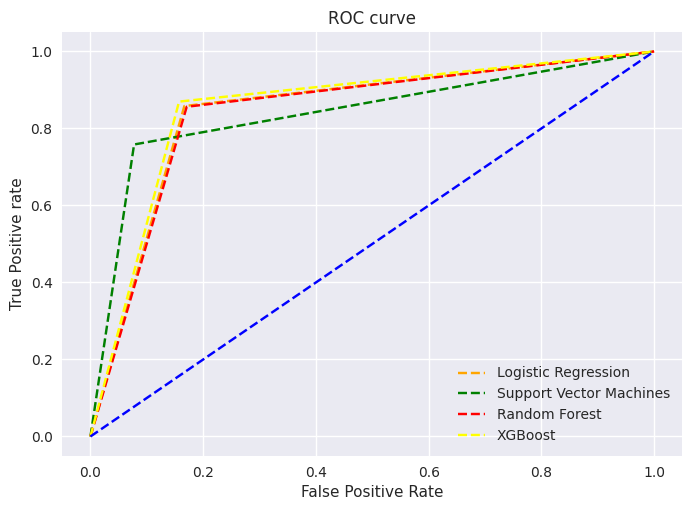

In [ ]:
plt.style.use('seaborn-v0_8')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=model_name[0])
plt.plot(fpr2, tpr2, linestyle='--',color='green', label=model_name[1])
plt.plot(fpr3, tpr3, linestyle='--',color='red', label=model_name[2])
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label=model_name[3])
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The following features importance chart justify the hypothesis of vocabs that can distinguish between two sentiments. It suggests that using negative vocabs having higher contribution in differentiating between sentiment levels.

In [ ]:
feature_importances_df = pd.DataFrame({"feature": X_train.columns, \
                                       "importance": models['XGBoost'].feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.024603
1811,tfidf_bad,0.013495
28038,tfidf_waste,0.008697
1718,tfidf_awful,0.007390
7673,tfidf_dull,0.007179
2901,tfidf_bore,0.006247
19666,tfidf_poorly,0.005907
2911,tfidf_boring,0.005794
19663,tfidf_poor,0.005790
28577,tfidf_worst,0.005473


The confusion matrix confirms that the model XGBoost has a high accuracy and precision. Also, the model predicts both sentiments with the same performance. 

Confusion matrix:
 [[4214  786]
 [ 651 4349]]


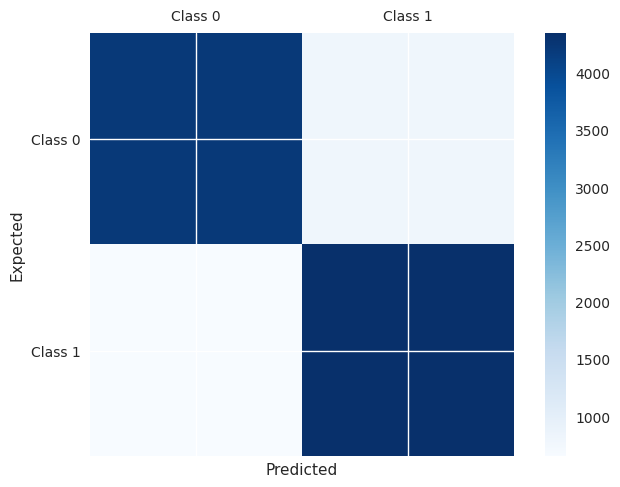

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=models['XGBoost'].predict(X_test))
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

The XGBoost has returned a mean accuracy close to 85% after applying stratified shuffle split in 5 folds. This proves that the model is reliable in every test trial.

In [ ]:
stratified_shuffle_split = StratifiedShuffleSplit(test_size=.3, train_size=.7, n_splits=5)
scores = cross_val_score(models['XGBoost'], X_train, y_train, cv=stratified_shuffle_split)
print("Cross-validation scores:\n{}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores:
[0.84675    0.85316667 0.85       0.85333333 0.85458333]
Mean accuracy: 0.85


# Output Performance

The best model is XGBoost, which outcompetes other models in terms of accuracy, precision, and AUC (85%, 85%, and 0.85 respectively). The confusion matrix and cross validation justify that the XGBoost is a highly reliable model. Moreover, the training time of the XGBoost is around 280 ~ 360 seconds depend on the availability of computing resources.

# Findings

Movies with special effects attract the most audiences, and people view the story plot and acting performance from the main character as important properties when reviewing a movie. From the reviews, we can understand that the audience heavily criticizes horror movies, movies with sex scenes, nude scenes and fight scenes when compared to those with positive reviews. Romantic comedies, comedies, drama, and movies based on true stories are favored by the public at the moment.

<img src=".\pictures\most_popular_movie_genre.png" alt="Drawing" style="width: 770px;"/>

These observations are justified based on the statistics of Genres Movie Breadown (Genres Movie Breakdown for 2021, 2022).

# Recommendations

Based on the observations, it is recommended to avoid promoting movies that have mature content, such as sex or nude scenes, or genres that are viewed negatively, such as horror movies. Promoting movies with light content, strong story lines, or powerful actors can garner more positive reviews. Moreover, it is seen that romantic comedies, comedies, and drama movies will have a larger potential audience, and are worth promoting. Movies with split views (same level of positive and negative sentiment) can be used as personalized recommendation options for people with more niche taste, so as to give the audience a more personal accommodation towards their own taste, and avoid providing only generic or "pop" cultural preferences.

# Reference

The Numbers. 2022. Genres Movie Breakdown for 2021. [online] Available at: <https://www.the-numbers.com/market/2021/genres> [Accessed 4 April 2022].

Sieg, A. (2018, July 5). Text Similarities : Estimate the degree of similarity between two texts. Retrieved from https://medium.com/@adriensieg/text-similarities-da019229c894. 

Simple ways to read TSV files in python. Python Pool. (2021, June 22). Retrieved April 5, 2022, from https://www.pythonpool.com/read-tsv-file-python/ 

lakshmi25npathi. (2020, August 12). Sentiment analysis of IMDB Movie Reviews. Kaggle. Retrieved April 5, 2022, from https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews 

Joonilahn. (n.d.). Sentiment-analysis-for-hotel-reviews/sentiment analysis - hotel reviews.ipynb at master · Joonilahn/sentiment-analysis-for-hotel-reviews. GitHub. Retrieved April 5, 2022, from https://github.com/joonilahn/Sentiment-Analysis-for-Hotel-Reviews/blob/master/Sentiment%20Analysis%20-%20Hotel%20Reviews.ipynb 

Python program to check special characters. Studytonight.com. (n.d.). Retrieved April 5, 2022, from https://www.studytonight.com/python-programs/python-program-to-check-special-characters 

Editor. (2021, March 12). Sentiment analysis in Hotel Reviews: Developing a decision-making assistant for Travelers. AltexSoft. Retrieved April 5, 2022, from https://www.altexsoft.com/blog/sentiment-analysis-hotel-reviews/ 

Jonathanoheix. (n.d.). Sentiment-analysis-with-hotel-reviews/sentiment analysis with hotel reviews.ipynb at master · Jonathanoheix/sentiment-analysis-with-hotel-reviews. GitHub. Retrieved April 5, 2022, from https://github.com/jonathanoheix/Sentiment-analysis-with-hotel-reviews/blob/master/Sentiment%20analysis%20with%20hotel%20reviews.ipynb 

Singh, M. (2020, April 5). How to visualize pandas descriptive statistics functions. Medium. Retrieved April 5, 2022, from https://medium.com/analytics-vidhya/how-to-visualize-pandas-descriptive-statistics-functions-480c3f2ea87c 

Lukasz. Pandas CONCAT dictionary to dataframe. Stack Overflow. Retrieved April 5, 2022, from https://stackoverflow.com/questions/36366036/pandas-concat-dictionary-to-dataframe 

Categorizing and Tagging Words.(n.d.). Retrieved April 5, 2022, from https://www.nltk.org/book/ch05.html 

Python自然語言處理--NLTK--詞性標籤（pos_tag） - IT閱讀. (n.d.). Retrieved April 5, 2022, from https://www.itread01.com/content/1547007495.html 

Gensim: Topic modelling for humans. Doc2Vec Model - gensim. (2021, December 22). Retrieved April 5, 2022, from https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html 

Gensim: Topic modelling for humans. models.doc2vec – Doc2vec paragraph embeddings - gensim. (2021, December 22). Retrieved April 5, 2022, from https://radimrehurek.com/gensim/models/doc2vec.html 

Random Forest parameter tuning: Tuning Random Forest. Analytics Vidhya. (2020, June 26). Retrieved April 5, 2022, from https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/ 

7 types of classification algorithms. Analytics India Magazine. (2021, October 7). Retrieved April 5, 2022, from https://analyticsindiamag.com/7-types-classification-algorithms/ 

Python API reference. Python API Reference - xgboost 1.5.2 documentation. (n.d.). Retrieved April 5, 2022, from https://xgboost.readthedocs.io/en/stable/python/python_api.html 

Author: Fatih Karabiber Ph.D. in Computer Engineering, Fatih Karabiber Ph.D. in Computer Engineering, Editor: Brendan Martin Founder of LearnDataSci, &amp; Psychometrician, E. R. L. (n.d.). Binary classification. Learn Data Science - Tutorials, Books, Courses, and More. Retrieved April 5, 2022, from https://www.learndatasci.com/glossary/binary-classification/ 

Siddhanthc. (n.d.). ReviewsAnalyzer. GitHub. Retrieved April 5, 2022, from https://github.com/siddhanthc/ReviewsAnalyzer/blob/master/ReviewsAnalyzer.ipynb 

Patlolla, V. (2018, January 26). How to make SGD classifier perform as well as logistic regression using Parfit. Medium. Retrieved April 5, 2022, from https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4 

XGBOOST parameters: XGBoost parameter tuning. Analytics Vidhya. (2020, November 23). Retrieved April 5, 2022, from https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ 

AUC-Roc Curve in machine learning clearly explained. Analytics Vidhya. (2020, July 20). Retrieved April 5, 2022, from https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/ 

How does imdb.com make money? how does imdb.com make money? (n.d.). Retrieved April 5, 2022, from http://www.howwherewhat.in/2012/08/how-does-imdbcom-make-money.html 

satyadeep9123. (2018, June 13). What is the difference between predict and predict_proba? Data Science, Analytics and Big Data discussions. Retrieved April 5, 2022, from https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376/3 